In [5]:
with open('./flash-dumps/nonempty.bin', 'rb') as f:
    fw_full = f.read()
    
# Trim off the empty bytes
for i in range(len(fw_full) - 1, 0, -1):
    if fw_full[i] != 0xff:
        break
fw = fw_full[:i+1]

print(f'Original length: 0x{len(fw_full):x}')
print(f'Trimmed length: 0x{len(fw):x}')

Original length: 0x200000
Trimmed length: 0x1f0070


In [6]:
import numpy as np

fwa = np.array(list(fw), dtype=np.byte)
fwa

array([ 32,  74,   0, ...,  70, 111,  27], dtype=int8)

In [49]:
import multiprocessing as mp

# Assume each a/b is half the size of full FW
app_size = len(fw) // 2
app_b_offset = len(fw) // 2
fw_indices = range(len(fw))
offsets = range(-10000, 10000, 0x4)

app_a = fwa[0xbbc8:0xbbc8 + app_size]
app_b = fwa[0xdcb00:0xdcb00 + app_size]


def similarity_at_offset(offset: int):
    size = app_size - abs(offset)
    if offset > 0:
        a = app_a[:size]
        b = app_b[-size:]
    else:
        a = app_a[-size:]
        b = app_b[:size]
    return np.sum(np.equal(a, b))


with mp.Pool(8) as p:
    similarities = p.map(similarity_at_offset, offsets)

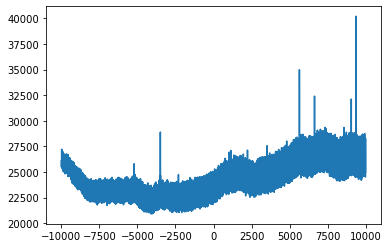

In [50]:
import matplotlib.pyplot as plt

plt.plot(offsets, similarities)
plt.show()

In [51]:
best_offset = offsets[similarities.index(max(similarities))]
print(best_offset, hex(best_offset))

9376 0x24a0


In [52]:
app_b[:best_offset]

array([ 31, -49, -16, ...,   2, -60, -63], dtype=int8)